# Imports

In [10]:
import torch

import yaml
import panel as pn
import io, base64


import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np

import sys, os
sys.path.append(os.path.abspath('..'))
from src import data_setup, models, evaluate, loss, engine, constants, postprocess
from src.utils import misc, plot

from PIL import Image, ImageOps

# device = constants.DEVICE
device = 'mps'
print(device)

pn.extension()

mps


# Load Saved Model

The model we are loading was trained with the default `config.yaml` file for **150 epochs.**

The model was also saved on **CPU**.

In [11]:
save_base = '../saved_models/yolov1_resnet50'

state_dict = torch.load(f'{save_base}_model.pth', map_location = 'cpu') # Model weights

with open(f'{save_base}_configs.yaml', 'r') as f:
    configs = yaml.safe_load(f) # Model configs (Doesn't include ResNet50 backbone)

In [12]:
# Create YOLOv1 model
backbone = models.build_resnet50_backbone()
yolov1 = models.YOLOv1(backbone = backbone, **configs)

yolov1.load_state_dict(state_dict)
yolov1 = yolov1.to(constants.DEVICE)

# Video Stream

In [13]:
# Create video stream
video_stream = pn.widgets.VideoStream(name = 'Video Stream', timeout = 100, 
                                      visible = False, width = 1280, height = 720)

In [14]:
img = Image.open('../test_images/humming_birb.jpeg')

In [15]:
mlp_pane = pn.pane.Matplotlib(object = None, tight = True, height = 500, width = 500,
                              styles = {'border':'red solid 1px'})

fig = plt.figure()
plt.imshow(img)
# plt.plot(np.arange(0, 10), np.arange(0, 10))

plt.gca().axis(False)
plt.close(fig)

In [16]:
mlp_pane.object = fig

Matplotlib(Figure, height=500, sizing_mode='fixed', styles={'border': 'red s...}, tight=True, width=500)
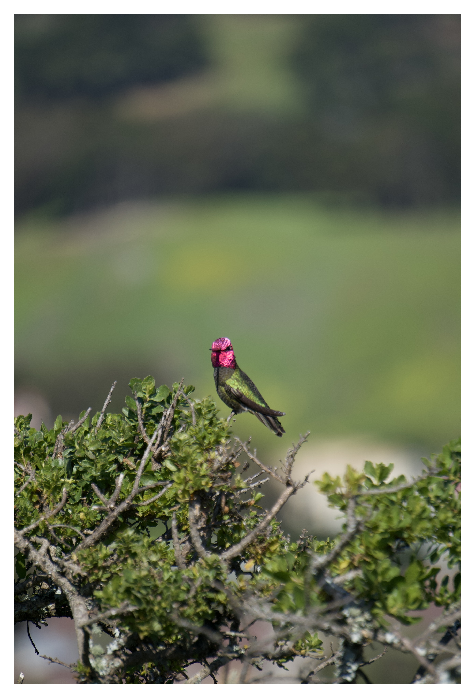

In [17]:
mlp_pane

In [6]:
# Create hidden video stream
video_stream = pn.widgets.VideoStream(name='Video Stream', timeout=100, visible=False, width=1280, height=720)

# Your transform and model setup assumed
# transforms = data_setup.get_transforms(train=False)
# yolov1 is your model
# evaluate.predict_yolov1 is your prediction function
# plot.draw_bboxes is your plotting function

@pn.depends(video_stream.param.value)
def update_plot(uri):
    if uri is None:
        return pn.pane.Markdown("No image captured.")

    try:
        # Decode and process image
        encoded_img = uri.split(',', 1)[1]
        image_bytes = io.BytesIO(base64.b64decode(encoded_img))
        pil_img = Image.open(image_bytes).convert('RGB').transpose(Image.FLIP_LEFT_RIGHT)

        # Transform and predict
        transforms = data_setup.get_transforms(train = False)
        trans_img = transforms(pil_img).to(device)
        pred_dicts = evaluate.predict_yolov1(
            yolov1, trans_img.unsqueeze(0),
            obj_threshold=0.25, nms_threshold=0.5
        )
        pred_res = pred_dicts[0]

        # Plot results
        fig = plot.draw_bboxes(
            pil_img,
            pred_res['boxes'] * 448,
            pred_res['labels'],
            pred_res['scores'],
            show_scores=False
        )
        return pn.pane.Matplotlib(fig, tight=True)

    except Exception as e:
        return pn.pane.Markdown(f"**Error:** {e}")

    
    
    

# Layout
dashboard = pn.Column(
    "# YOLOv1 Live Inference",
    video_stream,
    update_plot  # this gets auto-updated when video_stream.value changes
)

pn.serve(dashboard)

Launching server at http://localhost:49790


ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-91' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, i

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-198' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-375' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-462' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-557' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-655' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-748' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-835' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-917' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

ERROR:tornado.application:Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x107cda7b0>>, <Task finished name='Task-998' coro=<ServerSession.with_document_locked() done, defined at /Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py:77> exception=RuntimeError("Models must be owned by only a single document, ImportedStyleSheet(id='f3ca7d42-4432-4b61-b716-dfdcab050641', ...) is already in a doc")>)
Traceback (most recent call last):
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/tornado/ioloop.py", line 782, in _discard_future_result
    future.result()
    ~~~~~~~~~~~~~^^
  File "/Users/jeff/miniforge3/envs/pytorch_apps/lib/python3.13/site-packages/bokeh/server/session.py", line 94, 

In [81]:
video = pn.widgets.VideoStream(timeout=100, visible=False)
html = pn.pane.HTML()
pause = pn.widgets.Toggle(name='Pause')

pause.jslink(video, value='paused')
video.jslink(html, code={'value': """
target.text = `<img src="${source.value}" width=320 height=240 />`
"""})

pn.Column(pause, pn.Row(video, html))

Column
    [0] Toggle(name='Pause')
    [1] Row
        [0] VideoStream(timeout=100, visible=False)
        [1] HTML(None)